In [2]:
import numpy as np
import tensorflow as tf
import cv2
import random
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
# defining the path and classes.
random_test = '../input/driver/'
classes = ['c0','c1','c2','c3','c4','c5','c6','c7','c8','c9']

train_path='/kaggle/input/state-farm-distracted-driver-detection/imgs/train'
test_path='/kaggle/input/state-farm-distracted-driver-detection/imgs/test'

In [18]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [19]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(150, 150),
    batch_size=64,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(150, 150),
    batch_size=64,
    class_mode='categorical',
    subset='validation'
)

Found 17943 images belonging to 10 classes.
Found 4481 images belonging to 10 classes.


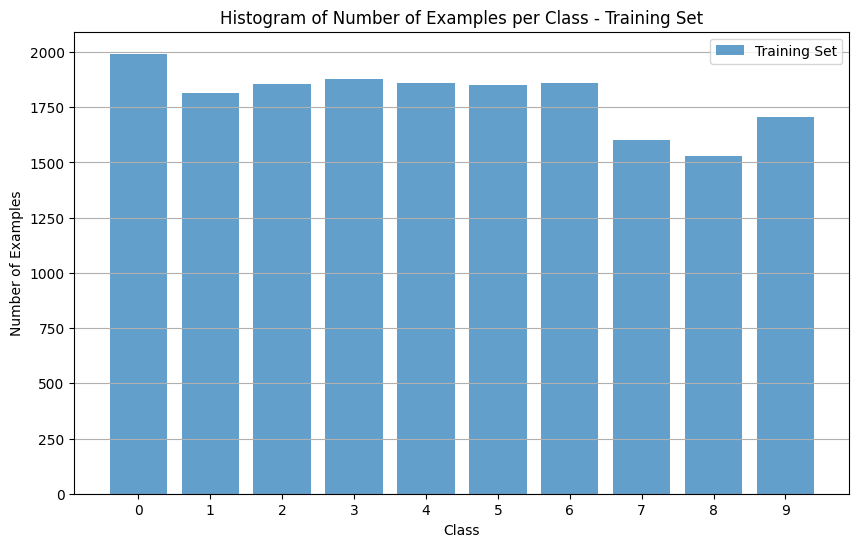

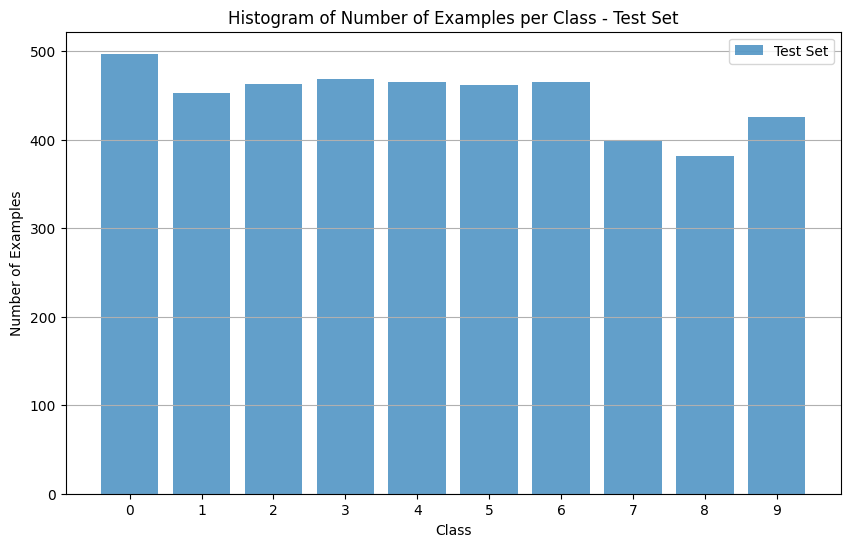

In [10]:
train_classes, train_counts = np.unique(train_generator.classes, return_counts=True)
test_classes, test_counts = np.unique(validation_generator.classes, return_counts=True)

# Plot histogram for training set
plt.figure(figsize=(10, 6))
plt.bar(train_classes, train_counts, label='Training Set', alpha=0.7)
plt.title('Histogram of Number of Examples per Class - Training Set')
plt.xlabel('Class')
plt.ylabel('Number of Examples')
plt.xticks(train_classes)
plt.legend()
plt.grid(axis='y')
plt.show()

# Plot histogram for test set
plt.figure(figsize=(10, 6))
plt.bar(test_classes, test_counts, label='Test Set', alpha=0.7)
plt.title('Histogram of Number of Examples per Class - Test Set')
plt.xlabel('Class')
plt.ylabel('Number of Examples')
plt.xticks(test_classes)
plt.legend()
plt.grid(axis='y')
plt.show()

In [15]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 128)     3584      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 74, 74, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        73792     
                                                                 
 flatten_1 (Flatten)         (None, 331776)            0         
                                                                 
 dropout_1 (Dropout)         (None, 331776)            0         
                                                                 
 dense_2 (Dense)             (None, 32)                10616864  
                                                      

In [17]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
original_hist = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size)

Epoch 1/10
280/280 [==============================] - 63s 220ms/step - loss: 0.9002 - accuracy: 0.6987 - val_loss: 0.0984 - val_accuracy: 0.9748
Epoch 2/10
280/280 [==============================] - 61s 217ms/step - loss: 0.0950 - accuracy: 0.9723 - val_loss: 0.0757 - val_accuracy: 0.9790
Epoch 3/10
280/280 [==============================] - 60s 214ms/step - loss: 0.0540 - accuracy: 0.9831 - val_loss: 0.0407 - val_accuracy: 0.9893
Epoch 4/10
280/280 [==============================] - 71s 252ms/step - loss: 0.0304 - accuracy: 0.9899 - val_loss: 0.0292 - val_accuracy: 0.9922
Epoch 5/10
280/280 [==============================] - 60s 214ms/step - loss: 0.0294 - accuracy: 0.9909 - val_loss: 0.0369 - val_accuracy: 0.9904
Epoch 6/10
280/280 [==============================] - 61s 216ms/step - loss: 0.0248 - accuracy: 0.9922 - val_loss: 0.0354 - val_accuracy: 0.9904
Epoch 7/10
280/280 [==============================] - 60s 215ms/step - loss: 0.0246 - accuracy: 0.9922 - val_loss: 0.0279 - val_ac

In [21]:
conv_model = models.Sequential()

conv_model.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(150,150,3)))
conv_model.add(layers.BatchNormalization())
conv_model.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same'))
conv_model.add(layers.BatchNormalization(axis = 3))
conv_model.add(layers.MaxPooling2D(pool_size=(2,2), padding='same'))
conv_model.add(layers.Dropout(0.3))

conv_model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
conv_model.add(layers.BatchNormalization())
conv_model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
conv_model.add(layers.BatchNormalization(axis = 3))
conv_model.add(layers.MaxPooling2D(pool_size=(2,2),padding='same'))
conv_model.add(layers.Dropout(0.3))

conv_model.add(layers.Flatten())
conv_model.add(layers.Dense(units = 512,activation='relu'))
conv_model.add(layers.BatchNormalization())
conv_model.add(layers.Dropout(0.5))
conv_model.add(layers.Dense(units = 128,activation='relu'))
conv_model.add(layers.Dropout(0.25))
conv_model.add(layers.Dense(10,activation='softmax'))

In [22]:
conv_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 148, 148, 32)      128       
 Normalization)                                                  
                                                                 
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      9248      
                                                                 
 batch_normalization_1 (Bat  (None, 148, 148, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                      

In [23]:
conv_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
cpnv_hist = conv_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size)

Epoch 1/10
280/280 [==============================] - 91s 290ms/step - loss: 0.5861 - accuracy: 0.8168 - val_loss: 3.6841 - val_accuracy: 0.2288
Epoch 2/10
280/280 [==============================] - 77s 275ms/step - loss: 0.0909 - accuracy: 0.9728 - val_loss: 0.1488 - val_accuracy: 0.9475
Epoch 3/10
280/280 [==============================] - 68s 241ms/step - loss: 0.0541 - accuracy: 0.9827 - val_loss: 0.0337 - val_accuracy: 0.9924
Epoch 4/10
280/280 [==============================] - 78s 279ms/step - loss: 0.0464 - accuracy: 0.9849 - val_loss: 0.0380 - val_accuracy: 0.9908
Epoch 5/10
280/280 [==============================] - 70s 248ms/step - loss: 0.0606 - accuracy: 0.9798 - val_loss: 0.0938 - val_accuracy: 0.9663
Epoch 6/10
280/280 [==============================] - 66s 235ms/step - loss: 0.0327 - accuracy: 0.9909 - val_loss: 0.0190 - val_accuracy: 0.9946
Epoch 7/10
280/280 [==============================] - 68s 242ms/step - loss: 0.0290 - accuracy: 0.9905 - val_loss: 0.0541 - val_ac

### Data Augmentation

### Data Augmentation and Transfer learning (VGG16):

In [32]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications import VGG16

In [33]:
datagen = ImageDataGenerator(
    preprocessing_function= preprocess_input,
    rotation_range=10,
    width_shift_range=0.05,
    height_shift_range=0.05,
    shear_range=0.05,
    zoom_range=0.05,
    validation_split=0.2

)

In [35]:
train_generator = datagen.flow_from_directory(
        train_path,
        target_size=(150, 150),
        batch_size=64,
        class_mode='categorical',
        subset='training')

validation_generator = datagen.flow_from_directory(
        train_path,
        target_size=(150, 150),
        batch_size=64,
        class_mode='categorical',
        subset='validation')

Found 17943 images belonging to 10 classes.
Found 4481 images belonging to 10 classes.


In [36]:
conv_VGG = VGG16(
    include_top=False,
    weights='imagenet',
    input_shape=(150, 150, 3)
)

In [37]:
conv_VGG.trainable = False

In [38]:
model_vgg = tf.keras.models.Sequential([
    conv_VGG,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [39]:
model_vgg.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 8192)              0         
                                                                 
 dense_5 (Dense)             (None, 512)               4194816   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               65664     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 128)              

In [40]:
model_vgg.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [41]:
hist_vgg = model_vgg.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size)

Epoch 1/10
280/280 [==============================] - 205s 700ms/step - loss: 2.1659 - accuracy: 0.4332 - val_loss: 0.4848 - val_accuracy: 0.8551
Epoch 2/10
280/280 [==============================] - 180s 644ms/step - loss: 0.6184 - accuracy: 0.7986 - val_loss: 0.2031 - val_accuracy: 0.9397
Epoch 3/10
280/280 [==============================] - 179s 638ms/step - loss: 0.3955 - accuracy: 0.8798 - val_loss: 0.1483 - val_accuracy: 0.9580
Epoch 4/10
280/280 [==============================] - 178s 637ms/step - loss: 0.2748 - accuracy: 0.9173 - val_loss: 0.1406 - val_accuracy: 0.9558
Epoch 5/10
280/280 [==============================] - 178s 637ms/step - loss: 0.2297 - accuracy: 0.9354 - val_loss: 0.0666 - val_accuracy: 0.9781
Epoch 6/10
280/280 [==============================] - 179s 640ms/step - loss: 0.1763 - accuracy: 0.9482 - val_loss: 0.1052 - val_accuracy: 0.9710
Epoch 7/10
280/280 [==============================] - 184s 658ms/step - loss: 0.1806 - accuracy: 0.9503 - val_loss: 0.0691 -